In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from astropy.table import QTable
import astropy.units as u
from astropy.coordinates import SkyCoord, match_coordinates_sky

In [2]:
p1 = os.getcwd() + '/CT1/'
cat_r = QTable.read(p1 + 'HSC_R_COSMOS_prep_mosaic_cat.fits')
cat_i = QTable.read(p1 + 'HSC_I_COSMOS_prep_mosaic_cat.fits')
cat_g = QTable.read(p1 + 'HSC_G_COSMOS_prep_mosaic_cat.fits')
cat_r.colnames

['NUMBER',
 'FLAGS',
 'DURATION_ANALYSIS',
 'X_IMAGE',
 'Y_IMAGE',
 'XMIN_IMAGE',
 'XMAX_IMAGE',
 'YMIN_IMAGE',
 'YMAX_IMAGE',
 'XWIN_IMAGE',
 'YWIN_IMAGE',
 'ERRAWIN_IMAGE',
 'ERRBWIN_IMAGE',
 'ERRTHETAWIN_IMAGE',
 'ALPHA_J2000',
 'DELTA_J2000',
 'ALPHAWIN_J2000',
 'DELTAWIN_J2000',
 'ERRAWIN_WORLD',
 'ERRBWIN_WORLD',
 'ERRTHETAWIN_J2000',
 'XPEAK_IMAGE',
 'YPEAK_IMAGE',
 'ALPHAPEAK_J2000',
 'DELTAPEAK_J2000',
 'A_IMAGE',
 'B_IMAGE',
 'THETA_IMAGE',
 'A_WORLD',
 'B_WORLD',
 'THETA_J2000',
 'ELONGATION',
 'FLUX_RADIUS',
 'MAG_ISO',
 'MAGERR_ISO',
 'ISOAREA_IMAGE',
 'ISOAREAF_IMAGE',
 'ISOAREA_WORLD',
 'ISOAREAF_WORLD',
 'FLUX_APER',
 'FLUXERR_APER',
 'MAG_APER',
 'MAGERR_APER',
 'FLUX_AUTO',
 'FLUXERR_AUTO',
 'MAG_AUTO',
 'MAGERR_AUTO',
 'KRON_RADIUS',
 'BACKGROUND',
 'THRESHOLD',
 'MU_THRESHOLD',
 'FLUX_MAX',
 'MU_MAX',
 'XPSF_IMAGE',
 'YPSF_IMAGE',
 'ERRAPSF_IMAGE',
 'ERRBPSF_IMAGE',
 'ERRTHETAPSF_IMAGE',
 'ALPHAPSF_J2000',
 'DELTAPSF_J2000',
 'ERRAPSF_WORLD',
 'ERRBPSF_WORLD',
 'ERR

In [3]:
flags_i = np.where(cat_i['FLAGS']<2)[0]
cat_i, cat_r, cat_g = cat_i[flags_i], cat_r[flags_i], cat_g[flags_i]

flags_r = np.where(cat_r['FLAGS']<2)[0]
cat_i, cat_r, cat_g = cat_i[flags_r], cat_r[flags_r], cat_g[flags_r]

flags_g = np.where(cat_g['FLAGS']<2)[0]
cat_i, cat_r, cat_g = cat_i[flags_g], cat_r[flags_g], cat_g[flags_g]

In [4]:
flags = np.where((cat_i['MAG_AUTO'].value>19)&(cat_i['MAG_AUTO'].value<23.5)&((cat_i['MAG_APER'][:,1].value-cat_i['MAG_APER'][:,4].value)>0.6))[0]
cat_i = cat_i[flags]
cat_r = cat_r[flags]
cat_g = cat_g[flags]

Text(0, 0.5, 'r-i')

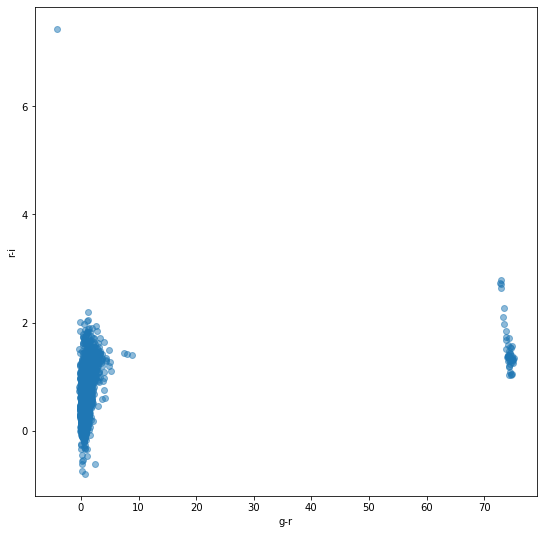

In [5]:
ri1 = cat_r['MAG_APER'][:,3] - cat_i['MAG_APER'][:,3]
gr1 = cat_g['MAG_APER'][:,3] - cat_r['MAG_APER'][:,3]

plt.figure(figsize=(9,9))
plt.scatter(gr1, ri1, alpha=0.5)
plt.xlabel('g-r')
plt.ylabel('r-i')